# Proyek Analisis Data: [BIKE SHARING DATASET]
- **Nama:** [Muhammad Ridha]
- **Email:** [ridhauwu@gmail.com]
- **ID Dicoding:** [muridha]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
- Pertanyaan 2

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# loading data tabel hour dan day
hour_df = pd.read_csv('data/hour.csv')
day_df = pd.read_csv('data/day.csv')

#### data pada tabel:
- instant: indeks catatan
- dteday : tanggal
- season : musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)
- yr : tahun (0: 2011, 1: 2012)
- mnth : bulan (1 sampai 12)
- hr(hanya ada di hour_df/hour.csv) : jam (0 hingga 23)
- holiday : hari cuaca hari libur atau tidak (diambil dari http://dchr.dc.gov/page/holiday-schedule)
- weekday : hari dalam seminggu
- workingday : jika hari tersebut bukan akhir pekan atau hari libur maka nilainya 1, jika tidak maka nilainya 0.
- weathersit : 
    - 1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
	- 2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
	- 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan
	- 4: Hujan Lebat + Butiran Es + Badai Petir + Kabut, Salju + Kabut
- temp: Suhu yang dinormalisasi dalam Celcius. Nilai dibagi menjadi 41 (maks)
- atemp: Suhu perasaan yang dinormalisasi dalam Celcius. Nilai dibagi menjadi 50 (maks)
- hum: Kelembapan yang dinormalisasi. Nilai dibagi menjadi 100 (maks)
- windspeed: Kecepatan angin yang dinormalisasi. Nilai dibagi menjadi 67 (maks)
- casual: jumlah pengguna biasa
- terdaftar: jumlah pengguna terdaftar
- cnt: jumlah total sepeda sewaan termasuk yang kasual dan terdaftar

In [3]:
# cek data hour_df
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# cek data day_df
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

- cek anomali general(tipe data salah dll)
- cek missing value
- cek duplicate
- cek anomali parameter statistik

In [5]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


tipe data sudah sesuai

In [7]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak ada nilai missing pada tabel hour_df

In [8]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak ada nilai missing pada tabel day_df

In [9]:
print('jumlah duplikasi tabel hour_df: {}'.format(hour_df.duplicated().sum()))

jumlah duplikasi tabel hour_df: 0


In [11]:
print('jumlah duplikasi tabel day_df: {}'.format(day_df.duplicated().sum()))

jumlah duplikasi tabel day_df: 0


tidak ada nilai yang duplikasi pada kedua tabel

### Cleaning Data

tidak ada masalah pada kedua tabel yang ada

## Exploratory Data Analysis (EDA)

### Explore ...

menggabungkan tabel hour_df dan day_df yang kemudian menjadi bike_df

In [12]:
bike_df = hour_df.merge(day_df, on='dteday', how='inner', suffixes=('_hour', '_day'))
bike_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


menambahkan label cuaca

In [13]:
weather_labels = {
    1: 'Jernih',
    2: 'Kabut',
    3: 'Curah Hujan Ringan',
    4: 'Curah Hujan Lebat'
}

bike_df['weather_label'] = bike_df['weathersit_day'].map(weather_labels)

In [14]:
bike_df.describe(include="all")

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,weather_label
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jernih
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11040
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963,NaN
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,...,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947,NaN
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000,NaN
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000,NaN
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000,NaN


bisa dilihat bahwa cuaca yang paling sering adalah jernih

In [18]:
bike_df.groupby('weather_label')['cnt_day'].mean().reset_index().sort_values("cnt_day", ascending=False)

,weather_label,cnt_day
1,Jernih,4895.177083
2,Kabut,4062.717595
0,Curah Hujan Ringan,1914.700855


In [19]:
bike_df.groupby('hr')['cnt_hour'].mean().reset_index()

,hr,cnt_hour
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


In [20]:
bike_df.groupby('holiday_day')['cnt_day'].mean().reset_index().sort_values("cnt_day", ascending=False)

,holiday_day,cnt_day
0,0,4556.906215
1,1,3750.060000


In [21]:
bike_df.registered_hour.sum()

2672662

cukup banyak insight yang didapat dari exploratory analysis

## Visualization & Explanatory Analysis

### Pertanyaan 1:

#### Bagaimana hubungan kondisi cuaca dengan jumlah rata-rata persewaan?

/var/folders/s2/7_bvycb11wsglw0k_b20bkkm0000gn/T/ipykernel_17841/1625493897.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cnt_day', y='weather_label', data=avg_weather, palette='viridis')


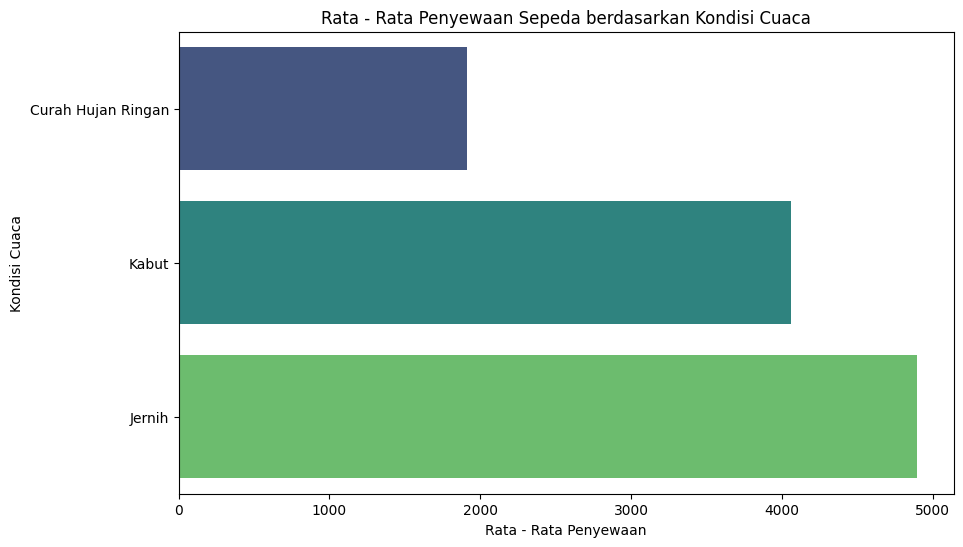

In [24]:
avg_weather = bike_df.groupby('weather_label')['cnt_day'].mean().reset_index().sort_values("cnt_day")

plt.figure(figsize=(10, 6))
sns.barplot(x='cnt_day', y='weather_label', data=avg_weather, palette='viridis')

plt.title('Rata - Rata Penyewaan Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Rata - Rata Penyewaan')
plt.ylabel('Kondisi Cuaca')

plt.show()

kondisi cuaca dengan jumlah rata-rata persewaan berhubungan erat seperti visualisasi diatas. Rata-rata persewaan paling banyak terjadi pada saat cuaca jernih dan paling sedikit terjadi saat cuaca hujan ringan

### Pertanyaan 2:

#### Berapa jumlah rata-rata persewaan sepeda per jam, dan bagaimana variasinya sepanjang hari?

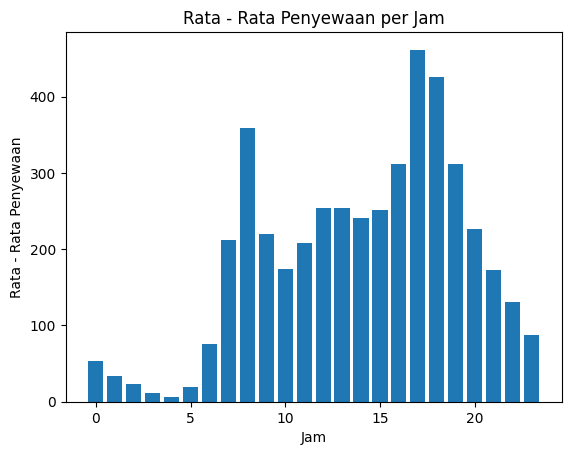

In [23]:
rental_jam = bike_df.groupby('hr')['cnt_hour'].mean()

plt.bar(rental_jam.index, rental_jam.values, color='#1f77b4')

plt.title('Rata - Rata Penyewaan per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata - Rata Penyewaan')

plt.show()

Rata - Rata Penyewaan sepeda paling banyak terjadi pada jam 17 dan 18 atau jam 5 PM dan 6 PM. Paling sedikit jam 4 AM

### Pertanyaan 3:

#### Bagaaimana hubungan hari libur tertentu yang terkait dengan kenaikan atau penurunan rata-rata Penyewaan?

/var/folders/s2/7_bvycb11wsglw0k_b20bkkm0000gn/T/ipykernel_17841/4193937324.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday_day', y='cnt_day', data=avg_holiday, palette='Set2')


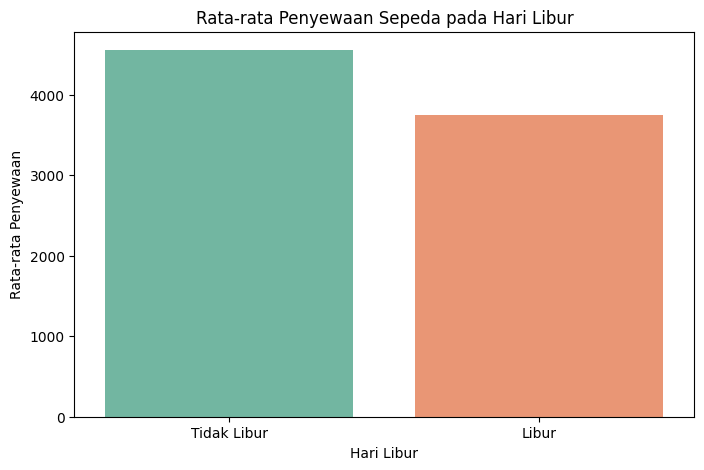

In [25]:
avg_holiday = bike_df.groupby('holiday_day')['cnt_day'].mean().reset_index().sort_values("cnt_day")

plt.figure(figsize=(8, 5))
sns.barplot(x='holiday_day', y='cnt_day', data=avg_holiday, palette='Set2')

plt.title('Rata-rata Penyewaan Sepeda pada Hari Libur')
plt.xlabel('Hari Libur')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks([0, 1], ['Tidak Libur', 'Libur'])

plt.show()

Rate - rata penyewaan terjadi saat hari tidak libur ( Senin - Jumat )

## Conclusion

- kesimpulan pertanyaan 1 adalah kondisi cuaca dengan jumlah rata-rata persewaan berhubungan erat seperti visualisasi diatas. Rata-rata persewaan paling banyak terjadi pada saat cuaca jernih dan paling sedikit terjadi saat cuaca hujan ringan
- kesimpulan pertanyaan 2 adalah Rata - Rata Penyewaan sepeda paling banyak terjadi pada jam 17 dan 18 atau jam 5 PM dan 6 PM. Paling sedikit jam 4 AM
- kesimpulan pertanyaan 3 adalah Rate - rata penyewaan terjadi saat hari tidak libur ( Senin - Jumat )

output data yang sudah dibersihkan

In [26]:
bike_df.to_csv("bike_df.csv", index=False)